# Predicting Bike Rentals 

The following dataset was downloaded from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [61]:
#import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
#Read datafile into pandas dataframe
day = pd.read_csv('/Users/praveen/work/lessons/bike_rental/Data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
#Check whether pandas has set 'dteday' column to datetime datatype.
type(day.iloc[0]['dteday'])

str

Pandas has recognized the date and converted the column into Datetime datatype.

In [30]:
#Checking for any missing data
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Date          0
dtype: int64

No data is missing

In [100]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


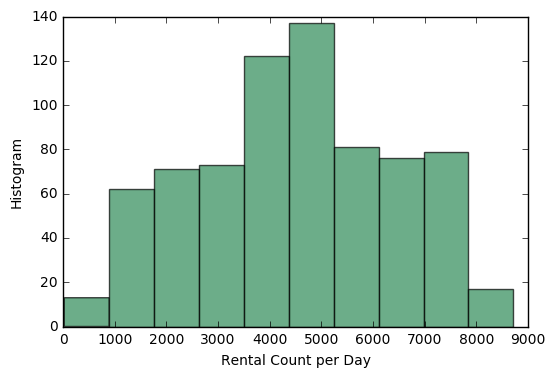

In [380]:
plt.hist(day['cnt'], color='seagreen', alpha=0.7)
ax = plt.gca()
ax.set_xlabel('Rental Count per Day')
ax.set_ylabel('Histogram')


Eventhough bike renting is likely to follow Binary distribution (rented *vs* not rented), I expected the total number of rentals per day to follow Normal distribution. However, the distribution above is not Gaussian. It is possible that the distribution varies with season. Let's break down the rental counts for each month.

(0, 13)

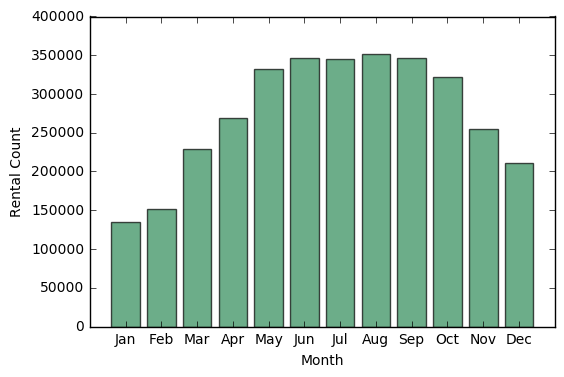

In [387]:
x = day.groupby('mnth').sum()['cnt']
g = plt.bar(left=x.index, height=x.values, 
            tick_label=['Jan','Feb', 'Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        align='center', color='seagreen', alpha=0.7)
ax = plt.gca()
ax.set_xlabel('Month')
ax.set_ylabel('Rental Count')
ax.set_xlim([0,13])

Indeed, there is a strong dependence of renting on the month. Naturally, summer months are much more popular than winter. 

(array([  2.,   1.,   1.,   6.,   9.,  12.,   4.,   0.,   4.,   7.,   6.,
          4.,   4.,   1.,   1.]),
 array([ 2633. ,  3010.4,  3387.8,  3765.2,  4142.6,  4520. ,  4897.4,
         5274.8,  5652.2,  6029.6,  6407. ,  6784.4,  7161.8,  7539.2,
         7916.6,  8294. ]),
 <a list of 15 Patch objects>)

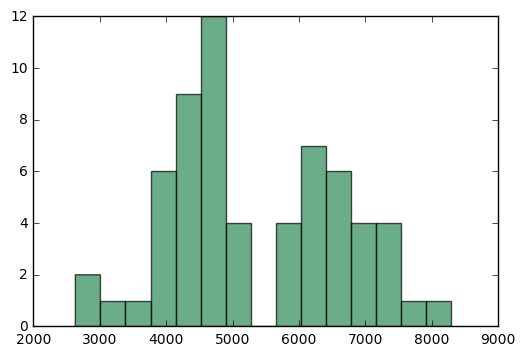

In [388]:
plt.hist(day[day['mnth']==5]['cnt'], color='seagreen', alpha=0.7,bins=15)

*Which day is popular for biking?*

<Container object of 7 artists>

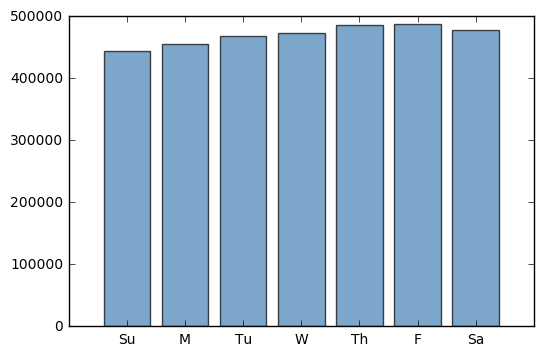

In [221]:
x=day.groupby('weekday').sum()['cnt']
plt.bar(left=x.index, height=x.values, tick_label=['Su','M','Tu','W','Th','F','Sa'],
        align='center', color='steelblue', alpha=0.7)


In [231]:
#Let's take a look at the correlation of *cnt* with features
corr = day.corr()
corr['cnt']

instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

The features showing strongest correlation with *cnt* are, *registered*, *casual*, *atemp* and *temp*. 

Interestingly, *instant* and *yr* also correlate significantly with *cnt*. This means that the usage of rental bike has increased over the 2 year period. Let's see the usage in years 2011 and 2012.

In [273]:
#corr['cnt']
day.groupby('yr').sum()['cnt']

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

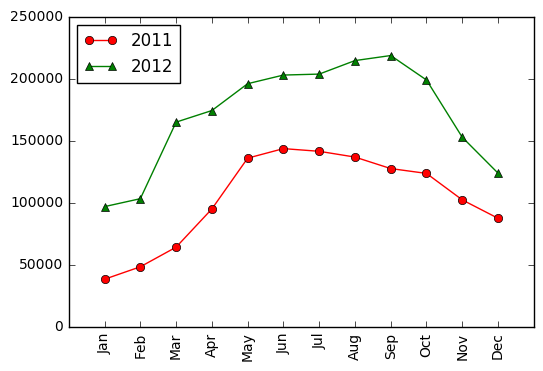

In [455]:
#Let's plot rental counts for each months, for two years

year0 = day[day['yr']==0].groupby('mnth').sum()['cnt']
year1 = day[day['yr']==1].groupby('mnth').sum()['cnt']

plt.plot(year0, '-or', year1, '-^g')
plt.legend(['2011','2012'], loc='best')
t=year0.index.tolist()
plt.xlim([0,13])
ax=plt.gca()
ax.xaxis.set_ticks(t)
ax.xaxis.set_ticklabels(months, rotation='vertical')

Indeed, there is generally an upward trend! For clarity, let me plot it as a continuous curve starting in 2011 Jan and ending in 2012 Dec.

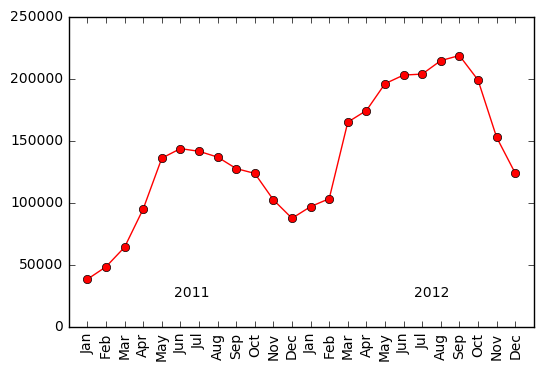

In [454]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year01 = year0.append(year1).reset_index().drop(['mnth'], axis=1)
#plotting using index as x-axis. Jan-Dec2011 are indexed 0-11 and 
# Jan-Dec 2012 indexed 12-23. Adding 1 to this index to start the plot at 1. 
plt.plot(year01.index+1, year01.values, '-or')#, year1, '-^g')

ax = plt.gca()
fig = plt.gcf()
#t2=np.append(t,(np.add(t,12)))
#t2
ax.xaxis.set_ticks(t2)
ax.xaxis.set_ticklabels(months+months, rotation='vertical')
fig.text(x=0.30, y=0.20,s='2011')
fig.text(x=0.70, y=0.20,s='2012')


In [656]:
corr = day.corr()
corr['cnt']

instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

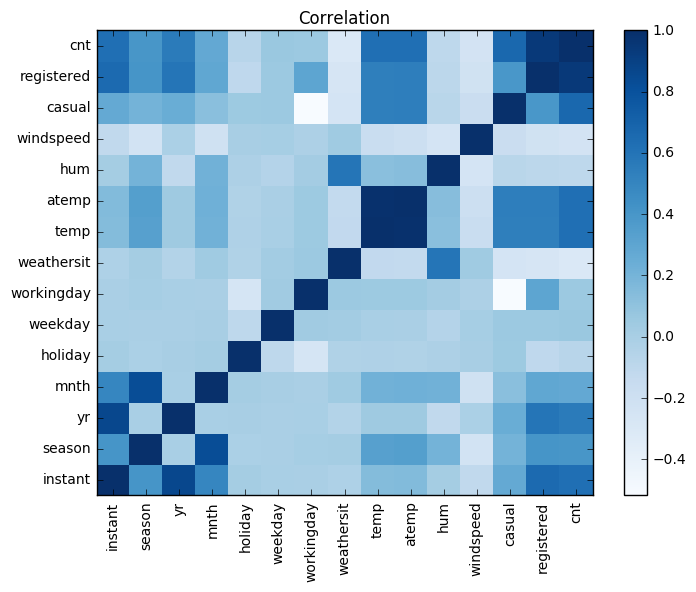

In [647]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
corr.set_index(np.arange(15), inplace=True)
plt.figure(figsize=(8,6))
plt.pcolor(corr, cmap='Blues')
plt.colorbar()
plt.xlim((0,15))
plt.ylim((0,15))
plt.title('Correlation')
t=list(range(15))
labels = corr.columns
len(labels)
ax=plt.gca()
ax.xaxis.set_ticks(np.add(t,0.5))
ax.xaxis.set_ticklabels(labels, rotation='vertical')#, position=(10.5,0))#(np.add(t,1.5),0,0))
ax.tick_params( 'right')

ax.yaxis.set_ticks(np.add(t,0.5))
ax.yaxis.set_ticklabels(labels)#, rotation='vertical')#, position=(10.5,0))#(np.add(t,1.5),0,0))
ax.tick_params( 'right')

    
#pos

### Predicting Number of Bike Rentals
Now let's examine how well we can predict the number of bikes rented.
We first split the data into training (75%) and test (25%) sets.
Then do a regression of the training data to estimate the regression parameters.
We then use the fitted values to predict the test data.

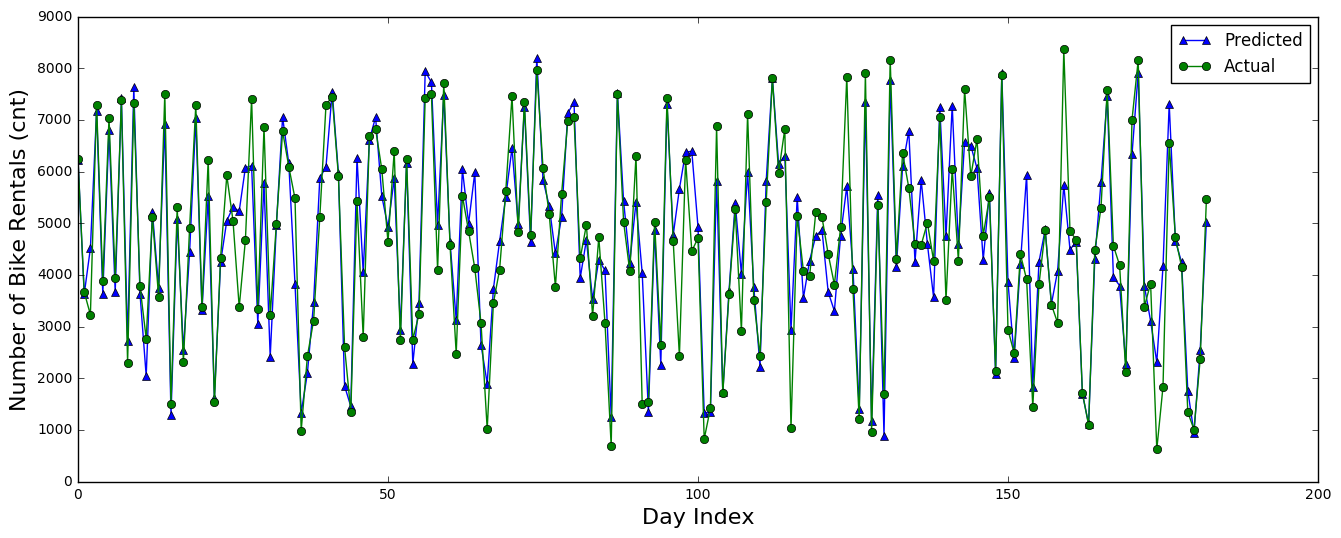

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#day.drop('dteday', axis=1, inplace=True)
X = day.drop(['instant','dteday', 'registered', 'casual'], axis=1)
cols = X.columns.tolist()[:-1]

y=day['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.25, random_state = 122)

#X_test.shape
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

reg_preds = reg.predict(X_test)

plt.figure(figsize=(16,6))
plt.plot(reg_preds, '^-', label='Predicted')
plt.plot( y_test, 'o-', label='Actual')
plt.xlabel('Day Index', fontsize = 16)
plt.ylabel('Number of Bike Rentals (cnt)', fontsize = 16)
plt.legend()

**Let's calculate correlation coefficient (Pearson's r) between predicted and actual number of bike rentals.**

In [270]:
import scipy
scipy.stats.pearsonr(x=y_test, y=reg_preds)

(0.9321133899210603, 9.227604329985249e-82)

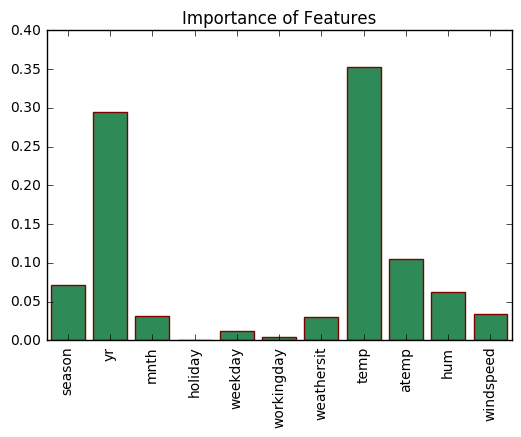

In [293]:
fig, ax = plt.subplots()
left = np.arange(11)
plt.bar(left=left,height=reg.feature_importances_, color='seagreen', edgecolor='maroon', align='center')
ax.set_xticks(left)
ax.set_xticklabels(cols, rotation='vertical')
ax.set_xlim([-0.5,10.5])
plt.title('Importance of Features')
#orientation='vertical')
#plt.bar?